In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import stats as st
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/advertising_cleaned.csv').drop(['Unnamed: 0'], axis = 1)
df.head()

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
0,666743,banner,interest,0.50,0.0,Android,150000
1,512217,video,interest,0.75,0.0,iOS,150000
2,399556,search,interest,1.50,0.0,iOS,150000
3,230119,search,interest,1.50,0.0,iOS,150000
4,619571,search,consideration,1.50,0.0,iOS,150000


Перекодирование значений колонки os в бинарный вид и удаление исходной колонки os

In [3]:
ohe = OneHotEncoder(sparse_output = False)
ohe

OneHotEncoder(sparse_output=False)

In [4]:
encoded_os = ohe.fit_transform(df[['os']])

In [5]:
df_encoded_os = pd.DataFrame(encoded_os, columns=ohe.get_feature_names_out(['os']))

In [6]:
df = pd.concat([df, df_encoded_os], axis = 1).drop('os', axis=1)

Кодирование funnel_stage в числовой вид

In [7]:
df['funnel_stage'] = pd.factorize(df['funnel_stage'])[0]

Перекодирование ad_channel с помощью LabelEncoder

In [8]:
le = LabelEncoder()
le

LabelEncoder()

In [9]:
encoded_channels = le.fit_transform(df['ad_channel'])

In [10]:
df['ad_channel_encoded'] = encoded_channels
df = df.drop('ad_channel', axis = 1)
df

,user_id,funnel_stage,price,profit,timestamp,os_Android,os_iOS,ad_channel_encoded
0,666743,0,0.50,0.0,150000,1.0,0.0,0
1,512217,0,0.75,0.0,150000,0.0,1.0,6
2,399556,0,1.50,0.0,150000,0.0,1.0,5
3,230119,0,1.50,0.0,150000,0.0,1.0,5
4,619571,1,1.50,0.0,150000,0.0,1.0,5
...,...,...,...,...,...,...,...,...
974528,501946,2,1.50,0.0,224125,1.0,0.0,5
974529,749577,3,1.50,2136.0,224647,0.0,1.0,5
974530,929180,2,1.50,0.0,224682,0.0,1.0,5
974531,1034498,2,1.50,0.0,225430,0.0,1.0,5


In [11]:
df.corr()

,user_id,funnel_stage,price,profit,timestamp,os_Android,os_iOS,ad_channel_encoded
user_id,1.000000,0.045285,0.088260,0.023162,0.010881,-0.054291,0.054291,-0.080362
funnel_stage,0.045285,1.000000,0.014059,0.203228,0.041932,-0.014319,0.014319,0.004290
price,0.088260,0.014059,1.000000,0.012999,0.048473,-0.237317,0.237317,0.488740
profit,0.023162,0.203228,0.012999,1.000000,0.011159,-0.005921,0.005921,0.001530
timestamp,0.010881,0.041932,0.048473,0.011159,1.000000,-0.015423,0.015423,0.037421
os_Android,-0.054291,-0.014319,-0.237317,-0.005921,-0.015423,1.000000,-1.000000,-0.093161
os_iOS,0.054291,0.014319,0.237317,0.005921,0.015423,-1.000000,1.000000,0.093161
ad_channel_encoded,-0.080362,0.004290,0.488740,0.001530,0.037421,-0.093161,0.093161,1.000000


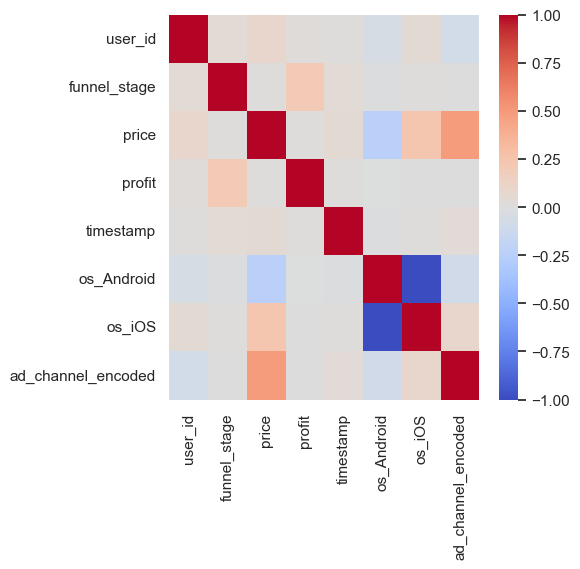

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df.corr(),cmap="coolwarm")
plt.savefig('data/heatmap.png', bbox_inches='tight')
plt.show()

Признаки ad_channel и price достаточно сильно скоррелированны, так как цена зависит рекламы зависит от рекламного канала.

Слабая корреляция между funnel_stage и profit обусловлена тем, что прибыль получали только на последнем этапе воронки.

Положительная корреляция (0,24) между price и os_iOS и отрицательная (-0,24) между price и os_Android говорит о том, что стоимость рекламы для разных операционных систем сильно отличается (обычно реклама на iOS дороже).

Корреляция между признаками os_Android и os_iOS есть и равна по модулю 1, т.к. оба этих признака сгенерированны из одного общего признака os.

In [ ]:
df.to_csv('data/for_cor_factor', index=False)